# TSX Catalog Bogota Acquisitions

## full catalog search
https://centaurus.caf.dlr.de:8443/eoweb-ng/template/default/welcome/entryPage.vm


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline
%qtconsole

In [5]:
df = pd.read_csv('tsx_stripmap_bogota.txt', sep='|')

In [11]:
print(df.keys())
df.head(1)

Index(['Id', 'Avail.', 'Transfer', 'Abstract', 'Identifier', 'Item Type',
       'Mission/Satellite', 'Sensor', 'Orbit', 'Start Date', 'End Date',
       'Mission-Satellite', 'Sensor/Instrument', 'Sensor Mode',
       'Polarization Mode', 'Polarization Channels',
       'Sat2 Polarisation Channels', 'Relative Orbit', 'Beam',
       'Incidence Angle Scene Center', 'Minimum Incidence Angle',
       'Maximum Incidence Angle', 'Pass Direction', 'Looking Direction',
       'System Order Identification', 'System Order Path', 'Path', 'Pass',
       'Row', 'Cloud Coverage', 'Order ID', 'RESA ID', 'Satellite',
       'Acquisition Item ID', 'Datatake Filenumber', 'Revision',
       'Commanded Starttime UTC', 'Scene Number', 'Master Satellite',
       'Master Starttime UTC', 'Applied To', 'Satellite 1', 'Satellite 2',
       'Datatake Class', 'Satellite Mode', 'Sat1 Satellite Mode',
       'Sat2 Satellite Mode', 'Common Cooperative Mode', 'Imaging Mode',
       'Antenna Look Direction', 'Antenna 

,Id,Avail.,Transfer,Abstract,Identifier,Item Type,Mission/Satellite,Sensor,Orbit,Start Date,...,Max Effective Fire Area,Datatake ID,Quality,Product Type,Operations Type,Item Descriptor Identifier,THUMBNAIL DATA,FOOTPRINT,ACQUISITIONDESCRIPTOR,Display
0,1,False,NaN,TSX-1.SAR.L1b-Stripmap,NaN,CatalogueScene,TSX-1,SAR,NaN,"2008-05-18T23:07:41,308",...,NaN,NaN,AUTO_APPROVED,NaN,OPERATIONAL,PID_TSX-1.SAR.L1b-Stripmap:/dims_nz_pl_dfd_XXX...,NaN,4.4838515518588 -73.957855 5.0227940285278 -74...,PID_TSX-1.SAR.L1b-Stripmap:/dims_nz_pl_dfd_XXX...,True


In [14]:
gb = df.groupby('Relative Orbit')
gb.Id.count()

Relative Orbit
44       4
66     107
135      5
157      2
Name: Id, dtype: int64

In [27]:
# Find scenes from previous RAW order, note keywords get truncated for some reason...
df66 = df[ (df["Relative Orbit"] == 66)] 
print(df66.Beam.unique())
df66.groupby('Beam').Id.count()

['strip_008' 'strip_007']


Beam
strip_007      2
strip_008    105
Name: Id, dtype: int64

In [28]:
df66.groupby("Polarization Channels").Id.count()

Polarization Channels
HH      4
VV    103
Name: Id, dtype: int64

In [43]:
orbit = 66
strip = 'strip_008'
pol = 'VV'
dfs = df[ (df["Relative Orbit"] == orbit) & (df["Beam"] == strip) & (df["Polarization Channels"] == pol) ]
dfs["Date"] = pd.to_datetime(dfs["Start Date"])

In [44]:
print('Relative Orbit: {}'.format(orbit))
print('Beam: {}'.format(strip))
print('Polarization: {}'.format(pol))
print(df66["Pass Direction"].iloc[0])
print('Incidence: {:.1f} to {:.1f}'.format(dfs["Minimum Incidence Angle"].iloc[0], dfs["Maximum Incidence Angle"].iloc[0]))
print('Dates :', len(dfs))

Relative Orbit: 66
Beam: strip_008
Polarization: VV
Descending
Incidence: 31.1 to 35.1
Dates : 103


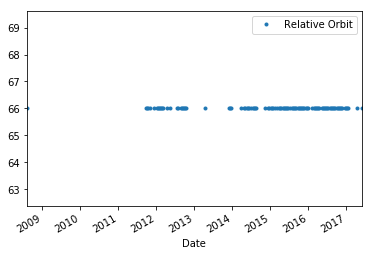

In [50]:
dfs.plot(y='Relative Orbit', x='Date', style='.')

In [59]:
# Archive orders must be 18months old
today = pd.to_datetime('today')
cutoff = today - pd.Timedelta(18*30, 'D')
print('Archive order cutoff date: ', cutoff.strftime('%Y/%m/%d'))

Archive order cutoff date:  2015/12/09


In [63]:
print(len(dfs.query('Date <= @cutoff')), ' scenes older than 18months in archive')


69  scenes older than 18months in archive


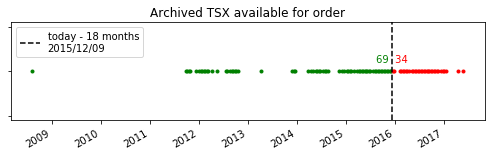

In [99]:
dfb = dfs.query('Date <= @cutoff')
dfa = dfs.query('Date > @cutoff')
fig,ax = plt.subplots(figsize=(8.5,2))
plt.plot(dfb.Date, np.ones(len(dfb)), 'g.')
plt.plot(dfa.Date, np.ones(len(dfa)), 'r.')

plt.text(cutoff, 1.01, '{} '.format(len(dfs.query('Date <= @cutoff'))), ha='right', color='g')
plt.text(cutoff, 1.01, ' {}'.format(len(dfs.query('Date > @cutoff'))), ha='left', color='r')

plt.axvline(cutoff, linestyle='dashed', color='k', label='today - 18 months\n{}'.format(cutoff.strftime('%Y/%m/%d')))
plt.legend(loc='upper left')
plt.tick_params(labelleft=False)
plt.title('Archived TSX available for order')
fig.autofmt_xdate()
